# Analysis on the Energy consumption of different carbon capture methods

In [1]:
# Fix sys path to root directory so locally defined packages can be found
import sys
sys.path.append('C:\\Users\\2270577A\\PycharmProjects\\PhD_LCA_TEA')
# sys.path  # show system path to see if import was successful


In [2]:
# Import required packages
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from functions.general.utility import kJ_to_kWh, MJ_to_kWh
from objects import gaussian_dist_maker, triangular_dist_maker
from functions.MonteCarloSimulation import get_distribution_draws


In [3]:
# Get directory to save figures later
directory = os.getcwd()


In [4]:
# Option A: Vacuum Pressure Swing Adsorption (VPSA) (Pre-Comb)
process_name_A = "Pre combustion VPSA"
recovery_rate_A = 87.3  # [%] on a syngas basis
recovery_rate_A = recovery_rate_A / 100 # decimals
electricity_consumption_A = np.array([0.986, 0.698])  # [MJ/ kg CO2] when including/excluding CO2 compression
heat_consumption_A = 0.51  # [MJ/ kg CO2]
source_A = "http://dx.doi.org/10.1016/j.ijggc.2015.01.008"


In [5]:
# Option B: Amine-based Carbon Capture (Post-Comb)
process_name_B = "Post Combustion Amine Capture"
recovery_rate_B = 90  # [%] on a flue gas basis
recovery_rate_B = recovery_rate_B / 100 # decimals
electricity_consumption_B = np.array([0.324, 0.324, 0.324, 0.504, 0.492, 0.392, 0.402, 0.324, 0.325, 0.52, 1.02, 0.05])  # [MJ/ kg CO2]
heat_consumption_B = np.array([3.52, 3.11, 3.53, 2.62, 2.41, 2.76, 3.17, 3.1, 3.09, 2.22, 2.32, 3.5])  # [MJ/ kg CO2]
source_B = ["http://dx.doi.org/10.1016/j.ijggc.2013.03.002",
            "http://dx.doi.org/10.1016/j.ijggc.2015.01.008"]

# COMMENTS:
# - Ref 1 - relates to first 10 data points
# - Ref 2 - relates to the final 2 data points
# - recovery rate based on Ref 2
# - Electricity consumption calculated from Table 2 of Ref 1 for the first 10 data points



In [6]:
# Option C: Vacuum Pressure Swing Adsorption (VPSA) (Post-Comb)
process_name_C = "Post combustion VPSA"
recovery_rate_C = np.array([90.9, 93.4, 97.9, 74.4, 80.7, 91.3, 80, 91.1, 80.6, 93.3])  # [%] on a flue gas basis
recovery_rate_C = recovery_rate_C / 100 # decimals
electricity_consumption_C = np.array([0.8229, 0.5284, 0.594, 0.7236, 0.8293, 0.756, 0.5132, 0.6457, 0.5244, 0.4981])  # [MJ/ kg CO2]
heat_consumption_C = 0  # [MJ/ kg CO2]
source_C = "http://dx.doi.org/10.1016/j.jece.2017.07.029"

# COMMENTS:
# - Data taken from Table 6


# Option A - Vacuum Pressure Swing Adsorption (VPSA) (Pre-Comb)

In [7]:
# Create model
def carbon_capture_VPSA_pre_comb():

    # Define required data
    recovery_mean = 0.873  # as decimal on a syngas basis
    recovery_std = recovery_mean * 0.1  # use an estimated std of 10%

    electricity_consumption_mean = 0.986  # [MJ/ kg CO2]
    electricity_consumption_std = electricity_consumption_mean * 0.1 # [MJ/ kg CO2] use an estimated std of 10%

    heat_consumption_mean = 0.51  # [MJ/ kg CO2]
    heat_consumption_std = heat_consumption_mean * 0.1 # [MJ/ kg CO2] use an estimated std of 10%

    # Calculate outputs
    recovery_out = np.random.normal(recovery_mean, recovery_std)  # decimal
    electricity_out = np.random.normal(electricity_consumption_mean, electricity_consumption_std)  # [MJ/ kg CO2]
    heat_out = np.random.normal(heat_consumption_mean, heat_consumption_std)  # [MJ/ kg CO2]

    return {"Recovery": recovery_out, "Electricity consumption": electricity_out, "Heat consumption": heat_out}


In [8]:
# Test model
carbon_capture_VPSA_pre_comb()

{'Recovery': 0.9092565477580116,
 'Electricity consumption': 0.9964280423611155,
 'Heat consumption': 0.5154421601089975}

# Option B - Amine-based Carbon Capture (Post-Comb)

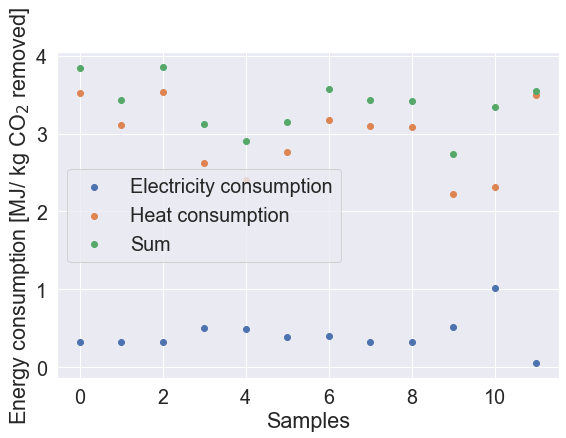

In [9]:
# Look at trends in data
plt.figure(figsize=(9,6))
sns.set(font_scale=1.8)
plt.scatter(np.arange(len(electricity_consumption_B)), electricity_consumption_B, label="Electricity consumption")
plt.scatter(np.arange(len(heat_consumption_B)), heat_consumption_B, label="Heat consumption")
total_consumption_B = electricity_consumption_B + heat_consumption_B
plt.scatter(np.arange(len(heat_consumption_B)), total_consumption_B, label="Sum")
plt.xlabel("Samples")
plt.ylabel("Energy consumption [MJ/ kg CO$_2$ removed]")
plt.legend()
plt.savefig(directory + r"\figures\CC_post_amine_energy.tiff", dpi=500, bbox_inches = "tight")
plt.show()

A somewhat inverse relationship can be identified between electricity and heat consumption. The last two points from a different study don't quite fit in as well as the rest of the data.


In [10]:
# Show fractions of electricity consumption related to complete consumption
electricity_fraction_B = electricity_consumption_B/total_consumption_B
print(electricity_fraction_B)

[0.0842872  0.09435061 0.0840685  0.16133163 0.16953825 0.12436548
 0.11254199 0.09462617 0.09516837 0.18978102 0.30538922 0.01408451]


In [11]:
# Discard outliers
electricity_fraction_B_clean = electricity_fraction_B[0:-2]
print("Array after discarding outliers:")
print(electricity_fraction_B_clean)

# Calculate mean ans std
electricity_fraction_B_mean = np.mean(electricity_fraction_B_clean)
electricity_fraction_B_std = np.std(electricity_fraction_B_clean)

print("Fraction of electricity consumption compared to total energy consumption:")
print("Mean:", electricity_fraction_B_mean)
print("Std:", electricity_fraction_B_std)


Array after discarding outliers:
[0.0842872  0.09435061 0.0840685  0.16133163 0.16953825 0.12436548
 0.11254199 0.09462617 0.09516837 0.18978102]
Fraction of electricity consumption compared to total energy consumption:
Mean: 0.12100592286808227
Std: 0.03685254640168524


In [12]:
# Calculate mean and std of total consumption
total_consumption_B_mean = np.mean(total_consumption_B)
total_consumption_B_std = np.std(total_consumption_B)
print("Total energy consumption:")
print("Mean:", total_consumption_B_mean)
print("Std:", total_consumption_B_std)


Total energy consumption:
Mean: 3.3625833333333333
Std: 0.3247276957527473


In [13]:
# Create model
def carbon_capture_amine_post_comb():

    # Define required data
    recovery_mean = 0.90  # as decimal on a flue gas basis
    recovery_std = recovery_mean * 0.1  # use an estimated std of 10%

    total_consumption_mean = 3.36  # [MJ/ kg CO2]
    total_consumption_std = 0.32  # [MJ/ kg CO2]
    total_consumption = np.random.normal(total_consumption_mean, total_consumption_std)

    electricity_fraction = np.random.normal(0.121, 0.037)
    heat_fraction = 1-electricity_fraction

    # Calculate outputs
    recovery_out = np.random.normal(recovery_mean, recovery_std)  # decimal
    electricity_out = total_consumption * electricity_fraction  # [MJ/ kg CO2]
    heat_out = total_consumption * heat_fraction  # [MJ/ kg CO2]

    return {"Recovery": recovery_out, "Electricity consumption": electricity_out, "Heat consumption": heat_out}


In [14]:
# Test final function
carbon_capture_amine_post_comb()

{'Recovery': 1.0297972040937111,
 'Electricity consumption': 0.3017533678618132,
 'Heat consumption': 3.3607845392289897}

# Option C - Vacuum Pressure Swing Adsorption (VPSA) (Post-Comb)


In [15]:
# Calculate mean and std
electricity_consumption_C_mean = np.mean(electricity_consumption_C)
electricity_consumption_C_std = np.std(electricity_consumption_C)
recovery_rate_C_mean = np.mean(recovery_rate_C)
recovery_rate_C_std = np.std(recovery_rate_C)

print("Electricity consumption:")
print("Mean:", electricity_consumption_C_mean)
print("Std:", electricity_consumption_C_std)

print("Recovery rate:")
print("Mean:", recovery_rate_C_mean)
print("Std:", recovery_rate_C_std)

Electricity consumption:
Mean: 0.64356
Std: 0.1240102350614658
Recovery rate:
Mean: 0.8736
Std: 0.07328601503697685


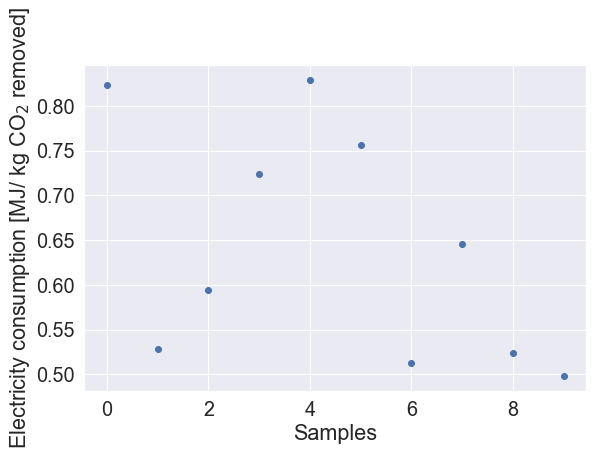

In [16]:
# Show electricity consumption distribution
plt.figure(figsize=(9,6))
sns.set(font_scale=1.8)
plt.scatter(np.arange(len(electricity_consumption_C)),
            electricity_consumption_C)
plt.xlabel("Samples")
plt.ylabel("Electricity consumption [MJ/ kg CO$_2$ removed]")
plt.savefig(directory + r"\figures\CC_post_VPSA_energy.tiff", dpi=500, bbox_inches = "tight")
plt.show()

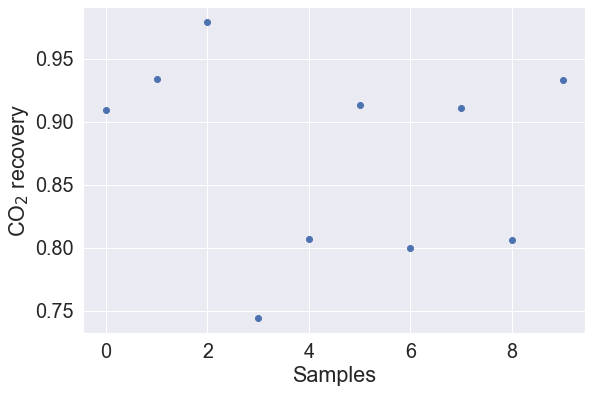

In [17]:
# Show recovery distribution
plt.figure(figsize=(9,6))
sns.set(font_scale=1.8)
plt.scatter(np.arange(len(recovery_rate_C)), recovery_rate_C)
plt.xlabel("Samples")
plt.ylabel("CO$_2$ recovery")
plt.savefig(directory + r"\figures\CC_post_VPSA_recovery.tiff", dpi=500, bbox_inches = "tight")
plt.show()

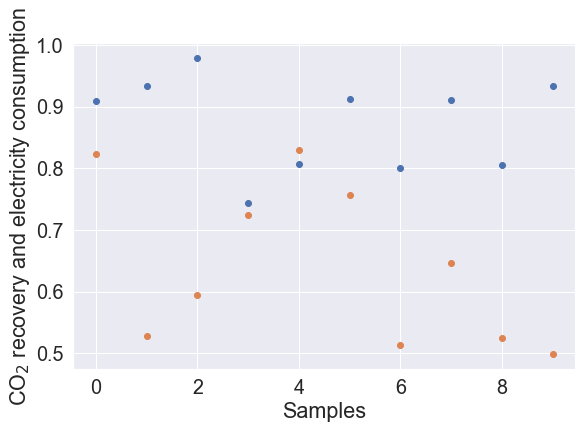

In [18]:
# Plot combined
plt.figure(figsize=(9,6))
sns.set(font_scale=1.8)
plt.scatter(np.arange(len(recovery_rate_C)), recovery_rate_C, label = "recovery")
plt.scatter(np.arange(len(electricity_consumption_C)),electricity_consumption_C, label = "electricity consumption")
plt.xlabel("Samples")
plt.ylabel("CO$_2$ recovery and electricity consumption")
plt.savefig(directory + r"\figures\CC_post_VPSA_combined.tiff", dpi=500, bbox_inches = "tight")
plt.show()


# Note: Does not look like there is a trend between higher energy consumption and higher recovery rate

In [19]:
# Create function to fit linear regression to data and calculate the corresponding RMSE of the regression model

def fit_linear_regression_with_rmse(x, y, display=True):

    polyfit_coefficients = np.polyfit(x=list(x), y=list(y), deg=1)
    regression_function = np.poly1d(polyfit_coefficients)

    # Alternative regression function - also works but for some reason yields wrong equation...
    # regression_function = Polynomial.fit(x=list(x), y=list(y), deg=1)

    predictions = []
    for x_variable in list(x):
        predictions.append(regression_function(x_variable))
    rmse = mean_squared_error(y, predictions, squared=False)
    r2 = r2_score(y, predictions)
    try:
        labels = {"x_label": x.name, "y_label": y.name}
    except:
        labels = "Could not be extracted from function inputs"

    x_limits = {"min": x.min(), "max": x.max()}
    if display:
        print("Regression function:", regression_function)
        print("RMSE:", rmse)
        print("R2:", r2)
        print("X limits:", x_limits)
        print("Labels:", labels)

    output = {"Regression function": regression_function,
              "RMSE": rmse,
              "R2": r2,
              "Labels": labels,
              "X_limits": x_limits
              }

    return output

In [20]:
# Check regression
model = fit_linear_regression_with_rmse(x=electricity_consumption_C,y=recovery_rate_C)

# Note: R2 of ~0. No correlation between electricity consumption and recovery rate.

Regression function:  
-0.09789 x + 0.9366
RMSE: 0.07227354932295564
R2: 0.027439668331638245
X limits: {'min': 0.4981, 'max': 0.8293}
Labels: Could not be extracted from function inputs


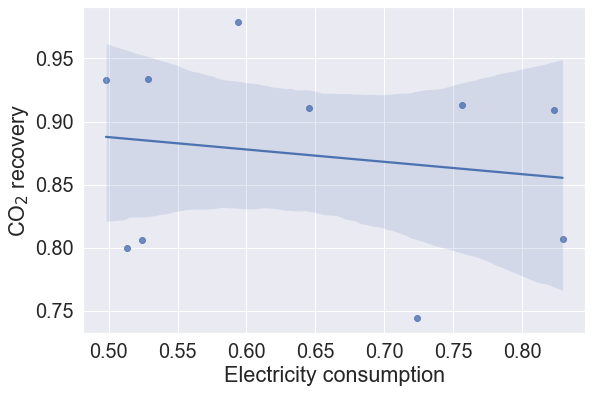

In [21]:
# Plot milling data - herbaceous biomass
plt.figure(figsize=(9,6))
sns.set(font_scale=1.8)
sns.regplot(x=electricity_consumption_C, y=recovery_rate_C)
plt.xlabel("Electricity consumption")
plt.ylabel("CO$_2$ recovery ")
plt.savefig(directory + r"\figures\CC_post_VPSA_regression.tiff", dpi=500, bbox_inches = "tight")
plt.show()

In [22]:
# Create model
def carbon_capture_VPSA_post_comb():

    # Define required data
    recovery_mean = 0.874  # as decimal on a flue gas basis
    recovery_std = 0.073

    electricity_consumption_mean = 0.644  # [MJ/ kg CO2]
    electricity_consumption_std = 0.124  # [MJ/ kg CO2]
    electricity_consumption = np.random.normal(electricity_consumption_mean, electricity_consumption_std)

    heat_consumption = 0  # no heat required

    # Calculate outputs
    recovery_out = np.random.normal(recovery_mean, recovery_std)  # decimal
    electricity_out = np.random.normal(electricity_consumption_mean, electricity_consumption_std)  # [MJ/ kg CO2]
    heat_out = heat_consumption  # [MJ/ kg CO2]

    return {"Recovery": recovery_out, "Electricity consumption": electricity_out, "Heat consumption": heat_out}


In [23]:
# Test model
carbon_capture_VPSA_post_comb()

{'Recovery': 0.8741061824716602,
 'Electricity consumption': 0.7332018734030705,
 'Heat consumption': 0}

# Sensibility check - using data from Option C

In [24]:

energy_consumptions = MJ_to_kWh(electricity_consumption_C) # [kWh/kg CO2]
recovery = recovery_rate_C

# Calculate mean and std
energy_consumption_mean = np.mean(energy_consumptions)
energy_consumption_std = np.std(energy_consumptions)
recovery_mean = np.mean(recovery)
recovery_std = np.std(recovery)


In [25]:
# Create distribution to generate histograms
energy_consumption_distribution = get_distribution_draws(gaussian_dist_maker(energy_consumption_mean, energy_consumption_std))
recovery_distribution = get_distribution_draws(triangular_dist_maker(lower=min(recovery), mode=recovery_mean, upper=max(recovery)))


energy consumption


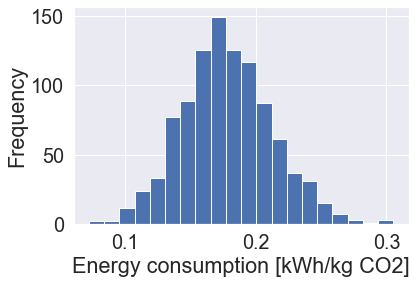

In [26]:
print("energy consumption")
plt.figure()
histogram = plt.hist(energy_consumption_distribution,20)
plt.xlabel("Energy consumption [kWh/kg CO2]")
plt.ylabel("Frequency")
plt.show()

Gas carbon recovery


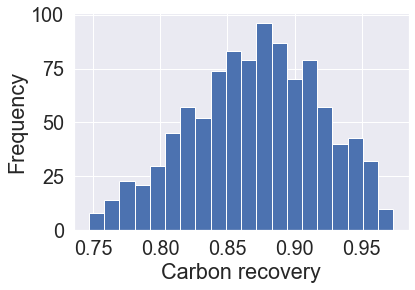

In [27]:
print("Gas carbon recovery")
plt.figure()
histogram = plt.hist(recovery_distribution,20)
plt.xlabel("Carbon recovery")
plt.ylabel("Frequency")
plt.show()

In [28]:
# Sensibility check of data
from processes.syngas_combustion import syngas_combustion_GWP_MC
from functions.LCA import electricity_GWP

# Calculate GWPs of syngas combustion
GWP_results = syngas_combustion_GWP_MC()

# Replace GWP results with approximated average GWP from biogenic and non-biogenic sources
GWP_simplified = 1800  # kg CO2/FU

neg_emissions = - GWP_simplified * recovery_mean  # kg CO2/FU
energy_req_emissions = electricity_GWP(energy_consumption_mean * GWP_simplified)

# Get current approximate avoided emissions due to electricity substitution - as used in the model right now.
GWP_avoided_elect_emissions= 180  # kg CO2/FU

ImportError: cannot import name 'syngas_combustion_GWP_MC' from 'processes.syngas_combustion' (C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\processes\syngas_combustion\__init__.py)

In [ ]:
print("Avoided emissions from incorporating carbon capture:", neg_emissions, "kg CO2/ FU")
print("Emission penalty due to increased energy consumption:", energy_req_emissions, "kg CO2/ FU")
print("Percentage emission from additional energy requirements vs avoided emissions due to capture:",-energy_req_emissions/neg_emissions * 100, "%")
print("Percentage emission from additional energy requirements vs previous avoided emissions:",energy_req_emissions/GWP_avoided_elect_emissions * 100, "%")


# Summary
- Results are promising.
- Looks like avoided emission from electricity substitution would be decreased by 40% - i.e. 40% less electricity available for export.
- Emissions due to increased electricity usage are 5% of emissions that could be avoided due to CC.